# Probability Distribution Problems

**Binomial Distribution**

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, for example, when you flip a coin it can by either Head or Tails.

In [2]:
# Probability functions, density and distribution

def dbinom(x,size,prob=0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    from scipy.stats import binom
    result=binom.pmf(k=x,n=size,p=prob,loc=0)
    return result

def pbinom(q,size,prob=0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    from scipy.stats import binom
    result=binom.cdf(k=q,n=size,p=prob,loc=0)
    return result

def qbinom(p, size, prob=0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    from scipy.stats import binom
    result=binom.ppf(q=p,n=size,p=prob,loc=0)
    return result

def rbinom(n,size,prob=0.5):
    """
    Generates random variables from the binomial distribution
    """
    from scipy.stats import binom
    result=binom.rvs(n=size,p=prob,size=n)
    return result

In [3]:
dbinom(2, size = 10, prob = 0.2) #Probability that a binomial (10,0.2) takes the value 2,
pbinom(2, size = 10, prob = 0.2) #Probability that a binomial (10,0.2) will take a value less than 2
qbinom(0.9, size = 10, prob = 0.2) # what value of a binomial (10,0.2) has a cumulative probability of 0.9?
rbinom(2000, size = 10, prob = 0.2) # generate 2000 random values from a binomial distribution (10,0.2)

array([1, 1, 1, ..., 1, 4, 2])

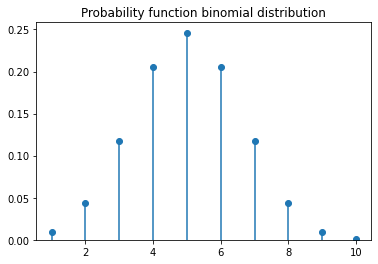

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Discrete distributions
xs = np.arange( 1, 11 )
ys = dbinom(xs,size=10,prob=0.5) # compute the shape of the distribution
plt.plot( xs, ys, 'o' )   # plot circles...
plt.vlines( xs, 0, ys )   # ...and lines
plt.ylim( bottom=0 )      # ensure sensible bottom border
plt.title('Probability function binomial distribution')
plt.show()

Exercise 1: Create the same functions but for the normal and uniform distribution.

In [11]:
#Code here

def dnorm(x,mu=0,sigma=1):
    """
    Calcula la función de densidad (pdf) de una distribución normal con media mu y desvío estándar sigma
    """
    from scipy.stats import norm
    result=norm.pdf(x,loc=mu,scale=sigma)
    return result

def pnorm(x,mu=0,sigma=1):
    """
    Calcula la función de distribución acumulada (cdf) de una distribución normal con media mu y desvío estándar sigma
    """
    from scipy.stats import norm
    result=norm.cdf(x,loc=mu,scale=sigma)
    return result

def qnorm(p,mu=0,sigma=1):
    """
    Calcula el percentil "p" para una distribución normal con media mu y desvío estándar sigma
    """
    from scipy.stats import norm
    result=norm.ppf(q=p,loc=mu,scale=sigma)
    return result

def rnorm(n,mu=0,sigma=1):
    """
    Generata n variables aleatorias de la distribution normal con media mu y desvío estándar sigma
    """
    from scipy.stats import norm
    result=norm.rvs(loc=mu, scale=sigma, size=n)
    return result

pdf(0.5) = 0.04
cdf(0.5) = 0.04
P(x <= 5.05) = 0.7


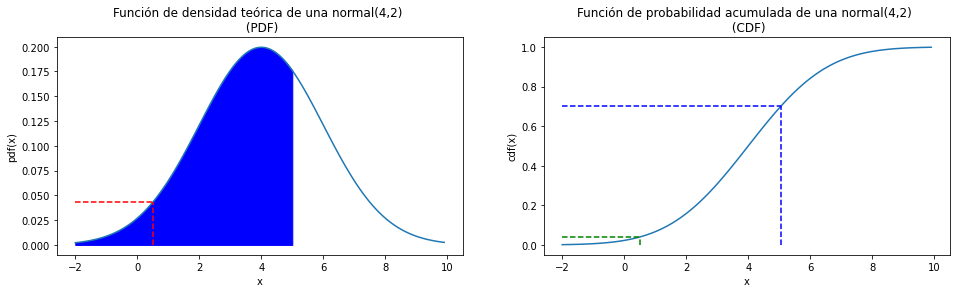

<class 'NoneType'>


In [77]:
### pruebo las funciones y grafico

# primero ejecutar en consola: pip install colorama
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore

## funcion que calcula la pdf y cdf para un valor de "punto" con distribución normal con media "mu" y desvío "sigma"
## grafica las funciones teóricas pdf y cdf y ubica los puntos asociados a "punto"
## también devuelve el percentil q de esa distribución si se asigna un valor a "perc", lo ubica en el cdf y pinta el área correspondiente en el pdf
## simula "n" valores de la distribución si se asigna un valor al parámetro

def funcion_normal(punto=None, perc=None, n=None, mu=0, sigma=1):

    np.random.seed(206)

    if punto is not None:
        # Densidad de la normal(mu,sigma) en el valor "punto"
        d = dnorm(punto, mu, sigma)
        print(Fore.RED + 'pdf(' + str(punto) + ') = ' + str(round(d, 2)))

        # Probabilidad de que una v.a. normal(mu,sigma) sea <= punto
        p = pnorm(punto, mu, sigma)
        print(Fore.GREEN + 'cdf(' + str(punto) + ') = ' + str(round(p, 2)))

    if perc is not None:
        # Qué valor de la normal(mu,sigma) acumula (100*perc)% de la probabilidad? P(X<=x) = perc, devuelve x
        q = qnorm(perc, mu, sigma) 
        print(Fore.BLUE + 'P(x <= ' + str(round(q, 2)) + ') = ' + str(perc))

    if n is not None:
        # Genera n valores aleatorias de una distribución normal(mu,sigma)
        x = rnorm(n, mu, sigma)
    else: x = None

    # Grafico los resultados anteriores
    fig, ax = plt.subplots(1, 2, figsize = (16, 4))

    x_min = mu-3*sigma
    x_max = mu+3*sigma

    xs = np.arange(x_min, x_max, 0.1)

    ax[0].plot(xs, dnorm(xs, mu, sigma))   # plot
    ax[0].set_title('Función de densidad teórica de una normal('+ str(mu) + ',' + str(sigma) + ') \n (PDF)')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('pdf(x)')
    if perc is not None:
        ax[0].fill_between(xs, dnorm(xs, mu, sigma), where = xs < q, color = 'blue')
    if punto is not None:
        ax[0].vlines(punto, 0, d, colors = 'red', linestyles = 'dashed')   # ...and lines
        ax[0].hlines(d, x_min, punto, colors = 'red', linestyles = 'dashed')   # ...and lines

    ax[1].plot(xs, pnorm(xs, mu, sigma))
    ax[1].set_title('Función de probabilidad acumulada de una normal('+ str(mu) + ',' + str(sigma) + ') \n (CDF)')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('cdf(x)')
    if perc is not None:
        ax[1].vlines(q, 0, perc, colors = 'blue', linestyles = 'dashed')   # ...and lines
        ax[1].hlines(perc, x_min, q, colors = 'blue', linestyles = 'dashed')   # ...and lines
    if punto is not None:
        ax[1].vlines(punto, 0, p, colors = 'green', linestyles = 'dashed')   # ...and lines
        ax[1].hlines(p, x_min, punto, colors = 'green', linestyles = 'dashed')   # ...and lines

    plt.show()

    return x

a = funcion_normal(punto = 0.5, perc = 0.7, mu = 4, sigma = 2) # en el objeto "a" se guarda la muestra de variables aleatorias simuladas
print(type(a))